In [21]:
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [34]:
# 📂 Préparer les données
data_dir = "../data/raw/chest_Xray/test"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

# Dataset
train_dataset = datasets.ImageFolder(root="../data/raw/chest_Xray/train", transform=transform)
test_dataset = datasets.ImageFolder(root="../data/raw/chest_Xray/test", transform=transform)
val_dataset = datasets.ImageFolder(root="../data/raw/chest_Xray/val", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

classes = train_dataset.classes

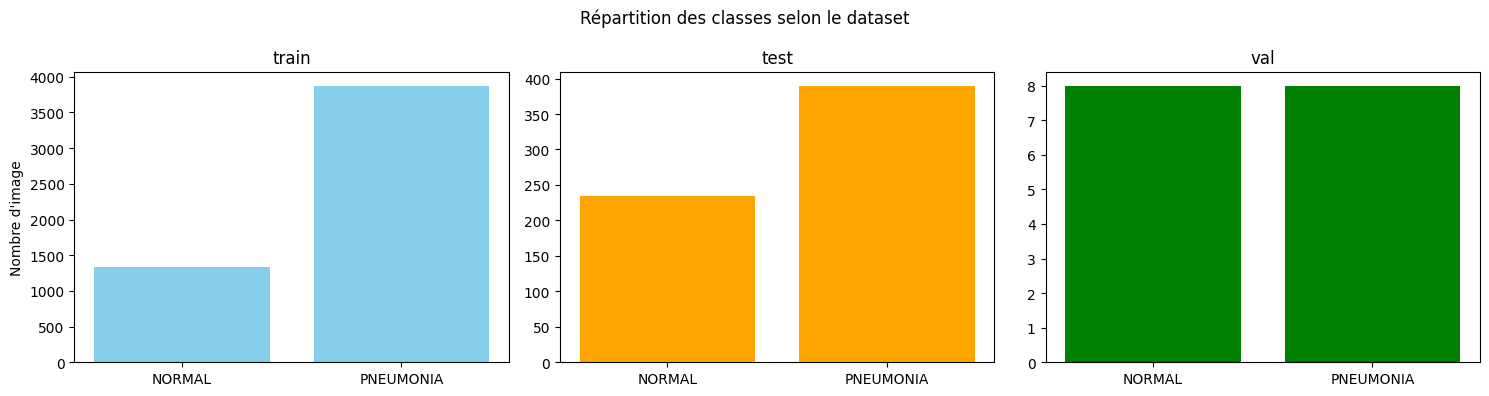

In [36]:

fig, axes = plt.subplots(1, 3, figsize=(15, 4))  

axes[0].bar(classes, [train_dataset.targets.count(0), train_dataset.targets.count(1)], color='skyblue')
axes[0].set_title('train')
axes[0].set_ylabel('Nombre d\'image')

axes[1].bar(classes, [test_dataset.targets.count(0), test_dataset.targets.count(1)], color='orange')
axes[1].set_title('test')

# Subplot 3 : exemple fictif
axes[2].bar(classes, [val_dataset.targets.count(0), val_dataset.targets.count(1)], color='green')
axes[2].set_title('val')

fig.suptitle('Répartition des classes selon le dataset')
plt.tight_layout()
plt.show()

In [32]:
from torch.utils.data import WeightedRandomSampler

# train
class_counts = [train_dataset.targets.count(0), train_dataset.targets.count(1)]
class_weights = 1. / np.array(class_counts)
sample_weights = [class_weights[label] for label in train_dataset.targets]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)

# test
class_counts = [test_dataset.targets.count(0), test_dataset.targets.count(1)]
class_weights = 1. / np.array(class_counts)
sample_weights = [class_weights[label] for label in test_dataset.targets]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

test_loader = DataLoader(test_dataset, batch_size=32, sampler=sampler)

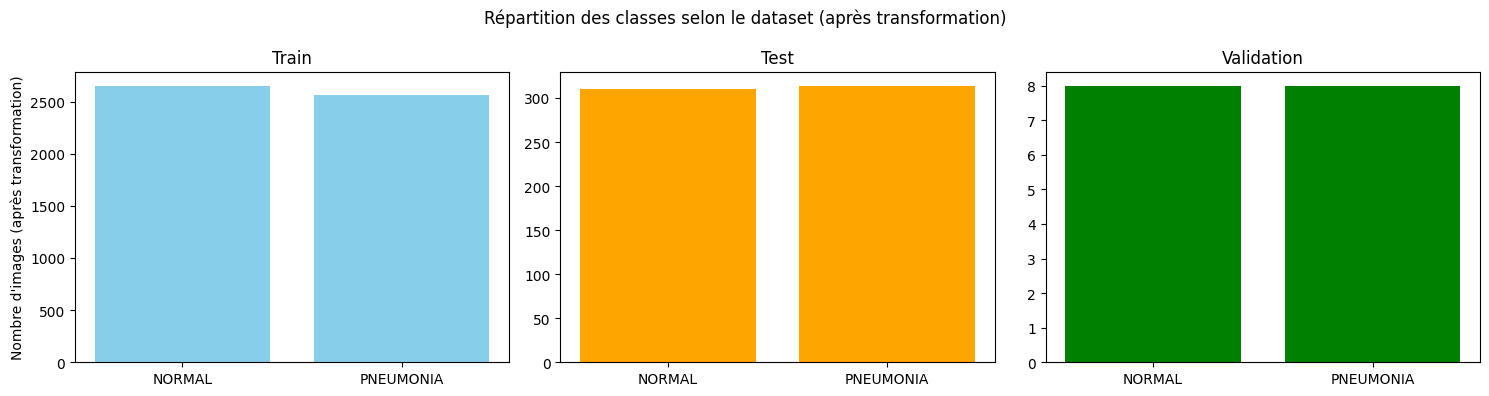

In [33]:
from collections import Counter
import matplotlib.pyplot as plt

def count_labels_from_loader(loader):
    label_counts = Counter()
    for images, labels in loader:
        label_counts.update(labels.tolist())
    return [label_counts[i] for i in range(len(classes))]

# Compter les classes après transformation via les DataLoaders
train_counts = count_labels_from_loader(train_loader)
test_counts = count_labels_from_loader(test_loader)
val_counts = count_labels_from_loader(val_loader)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))  

axes[0].bar(classes, train_counts, color='skyblue')
axes[0].set_title('Train')
axes[0].set_ylabel("Nombre d'images (après transformation)")

axes[1].bar(classes, test_counts, color='orange')
axes[1].set_title('Test')

axes[2].bar(classes, val_counts, color='green')
axes[2].set_title('Validation')

fig.suptitle('Répartition des classes selon le dataset (après transformation)')
plt.tight_layout()
plt.show()
